# Imports & Configs

In [23]:
%pip install numpy pandas seaborn matplotlib optuna sklearn xgboost catboost lightgbm > /dev/null 2>&1

Note: you may need to restart the kernel to use updated packages.


The system cannot find the path specified.


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tabulate import tabulate
import os
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [15]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\sc941\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\sc941\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


# Data Preprocessing & EDA

In [25]:
train=pd.read_csv('Train_data.csv')
test=pd.read_csv('Test_data.csv')
train

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,1
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,0
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,0
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,tcp,http,SF,216,674,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,0
86841,0,tcp,http,SF,368,1725,0,0,0,0,...,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,0
86842,28,tcp,ftp,SF,1483,4152,0,0,0,30,...,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,0
86843,0,tcp,smtp,SF,1679,385,0,0,0,0,...,0.16,0.08,0.00,0.00,0.69,0.00,0.01,0.00,18,0


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86845 entries, 0 to 86844
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                86845 non-null  int64  
 1   protocoltype            86845 non-null  object 
 2   service                 86845 non-null  object 
 3   flag                    86845 non-null  object 
 4   srcbytes                86845 non-null  int64  
 5   dstbytes                86845 non-null  int64  
 6   land                    86845 non-null  int64  
 7   wrongfragment           86845 non-null  int64  
 8   urgent                  86845 non-null  int64  
 9   hot                     86845 non-null  int64  
 10  numfailedlogins         86845 non-null  int64  
 11  loggedin                86845 non-null  int64  
 12  numcompromised          86845 non-null  int64  
 13  rootshell               86845 non-null  int64  
 14  suattempted             86845 non-null

In [27]:
train.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,1
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,0
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,0
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,0
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,1


In [28]:
train.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
count,86845.000000,8.684500e+04,8.684500e+04,86845.000000,86845.0,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,...,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000
mean,104.166872,8.455707e+03,2.732095e+03,0.000046,0.0,0.000035,0.144971,0.000771,0.441142,0.320583,...,0.526457,0.050186,0.075810,0.016246,0.324666,0.318934,0.092391,0.091045,20.060522,0.379964
std,1038.273538,3.582141e+05,5.543041e+04,0.006787,0.0,0.007588,1.837958,0.037009,0.496527,27.993474,...,0.447353,0.103323,0.208388,0.055271,0.464291,0.463506,0.282768,0.281452,1.421425,0.485380
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.550000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
75%,0.000000,2.720000e+02,7.680000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.070000,0.020000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,0.0,2.000000,77.000000,4.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


In [29]:
train.describe(include='object')

,protocoltype,service,flag
count,86845,86845,86845
unique,3,65,10
top,tcp,http,SF
freq,75876,31505,50672


## Missing Data

In [30]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

No missing values

## Duplicates 

In [31]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


Great! No duplicates

## Outliers 

In [24]:
# for col in df:
#     if col != 'class' and is_numeric_dtype(df[col]):
#         fig, ax = plt.subplots(2, 1, figsize=(12, 8))
#         g1 = sns.boxplot(x = df[col], ax=ax[0])
#         g2 = sns.scatterplot(data=df, x=df[col],y=df['class'], ax=ax[1])
#         plt.show()

No outliers

<AxesSubplot:>

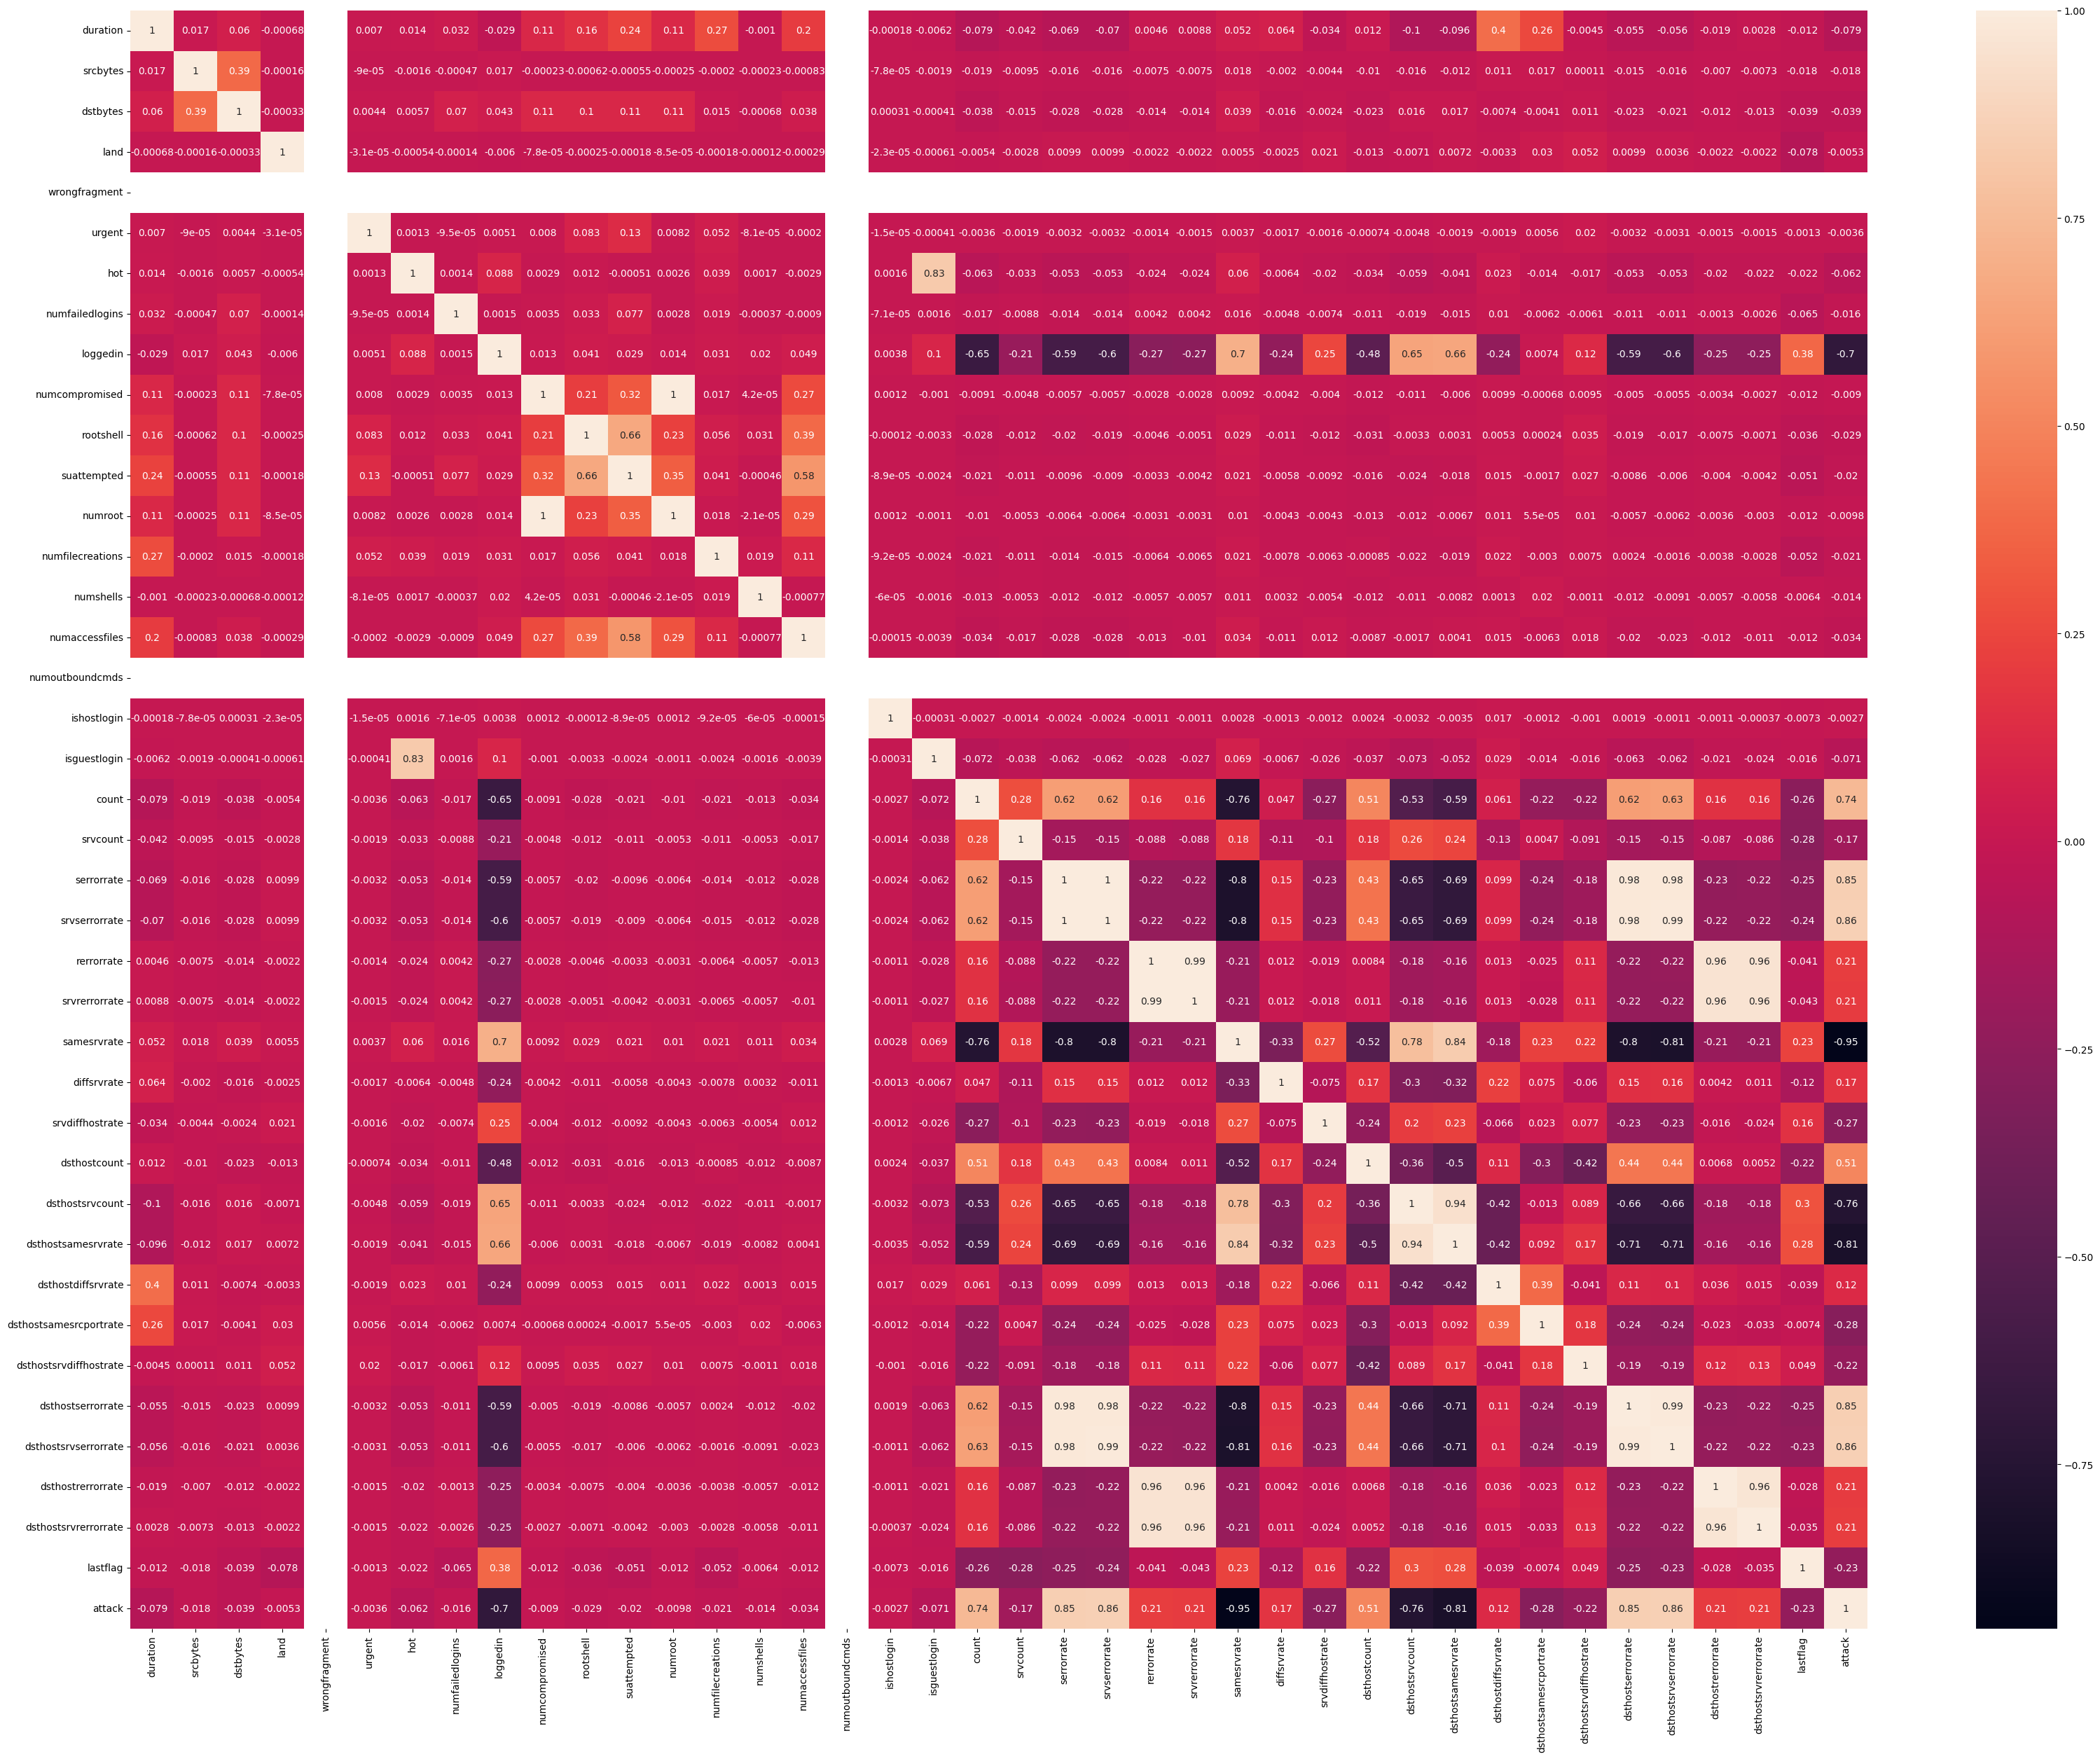

In [32]:
plt.figure(figsize=(40,30))
sns.heatmap(train.corr(), annot=True)

# import plotly.express as px
# fig = px.imshow(df.corr(), text_auto=True, aspect="auto")
# fig.show()

<AxesSubplot:xlabel='attack', ylabel='count'>

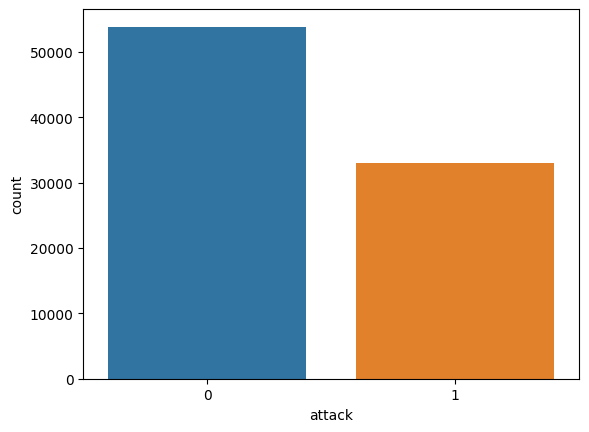

In [33]:
sns.countplot(x=train['attack'])

# Label Encoding

In [34]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [35]:
train.drop(['numoutboundcmds'], axis=1, inplace=True)
test.drop(['numoutboundcmds'], axis=1, inplace=True)
train.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,1,33,1,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,1
1,0,1,49,8,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,0
2,0,1,22,8,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,0
3,0,1,22,8,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,0
4,0,1,62,1,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,1


# Feature selection

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tabulate import tabulate
import os
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Read CSV files
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')

# Display train dataset info
train.info()

# Display first few rows of train dataset
train.head()

# Display summary statistics of train dataset
train.describe()

# Display summary statistics for object type columns
train.describe(include='object')

# Check for missing data
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count / total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

# Check for duplicate rows
print(f"Number of duplicate rows: {train.duplicated().sum()}")

# Display heatmap of correlations
plt.figure(figsize=(40, 30))
sns.heatmap(train.corr(), annot=True)

# Display count plot for 'attack' column
sns.countplot(x=train['attack'])

# Label Encoding
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

# Drop 'numoutboundcmds' column
train.drop(['numoutboundcmds'], axis=1, inplace=True)
test.drop(['numoutboundcmds'], axis=1, inplace=True)

# Feature selection
X_train = train.drop(['attack'], axis=1)
Y_train = train['attack']

rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=15)  # Increase the number of features selected
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i == True]

selected_features

X_train = X_train[selected_features]
test_selected = test[selected_features]  # Select the same features for the test set

# Split and scale data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test_selected = scale.transform(test_selected)

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

# Hyperparameter tuning for RandomForest with a wider search space
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 5, 50, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 15, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 50, 500, log=False) # Increased range
    classifier_obj = RandomForestClassifier(max_features=rf_max_features, max_depth=rf_max_depth, n_estimators=rf_n_estimators)
    accuracy = cross_val_score(classifier_obj, X_train, Y_train, cv=5).mean() # Using cross-validation
    return accuracy

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=100) # Increased number of trials
print(study_rf.best_trial)

rf = RandomForestClassifier(max_features=study_rf.best_trial.params['rf_max_features'], max_depth=study_rf.best_trial.params['rf_max_depth'], n_estimators=study_rf.best_trial.params['rf_n_estimators'])
rf.fit(x_train, y_train)

# Combine with other models in an ensemble
models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('rf', rf),
    ('gbm', GradientBoostingClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('ada', AdaBoostClassifier()),
    ('svc', SVC(probability=True))
]

# Voting Classifier
ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(x_train, y_train)

# Make predictions on the entire test data
predictions = ensemble.predict(test_selected)

# Create a DataFrame with the predictions
result_df = pd.DataFrame(predictions, columns=['attack'])

# Save the predictions to a CSV file
result_df.to_csv('result.csv', index=False)

ensemble_train, ensemble_test = ensemble.score(x_train, y_train), ensemble.score(x_test, y_test)

print(f"Train Score: {ensemble_train}")
print(f"Test Score: {ensemble_test}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86845 entries, 0 to 86844
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                86845 non-null  int64  
 1   protocoltype            86845 non-null  object 
 2   service                 86845 non-null  object 
 3   flag                    86845 non-null  object 
 4   srcbytes                86845 non-null  int64  
 5   dstbytes                86845 non-null  int64  
 6   land                    86845 non-null  int64  
 7   wrongfragment           86845 non-null  int64  
 8   urgent                  86845 non-null  int64  
 9   hot                     86845 non-null  int64  
 10  numfailedlogins         86845 non-null  int64  
 11  loggedin                86845 non-null  int64  
 12  numcompromised          86845 non-null  int64  
 13  rootshell               86845 non-null  int64  
 14  suattempted             86845 non-null

In [36]:
X_train = train.drop(['attack'], axis=1)
Y_train = train['attack']

In [37]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['flag',
 'srcbytes',
 'count',
 'srvserrorrate',
 'samesrvrate',
 'diffsrvrate',
 'dsthostsamesrvrate',
 'dsthostserrorrate',
 'dsthostsrvserrorrate',
 'dsthostrerrorrate']

In [38]:
X_train = X_train[selected_features]

# Split and scale data

In [3]:
 # Select the same features for the test set

# Split and scale data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

# K Nearest Neighbors (KNN) classification model

In [93]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [94]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.999501036309204], datetime_start=datetime.datetime(2024, 7, 3, 13, 37, 49, 927754), datetime_complete=datetime.datetime(2024, 7, 3, 13, 37, 53, 848794), params={'KNN_n_neighbors': 11}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [95]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.999671003931503
Test Score: 0.999501036309204


# Logistic Regression Model

In [96]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [97]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.9991775098287575
Test Score: 0.9991172180855147


# Decision Tree Classifier

In [98]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [99]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=2, state=TrialState.COMPLETE, values=[0.9997313272434175], datetime_start=datetime.datetime(2024, 7, 3, 13, 38, 33, 857865), datetime_complete=datetime.datetime(2024, 7, 3, 13, 38, 33, 880995), params={'dt_max_depth': 13, 'dt_max_features': 2}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=2, value=None)


In [100]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 1.0
Test Score: 0.9992707453749904


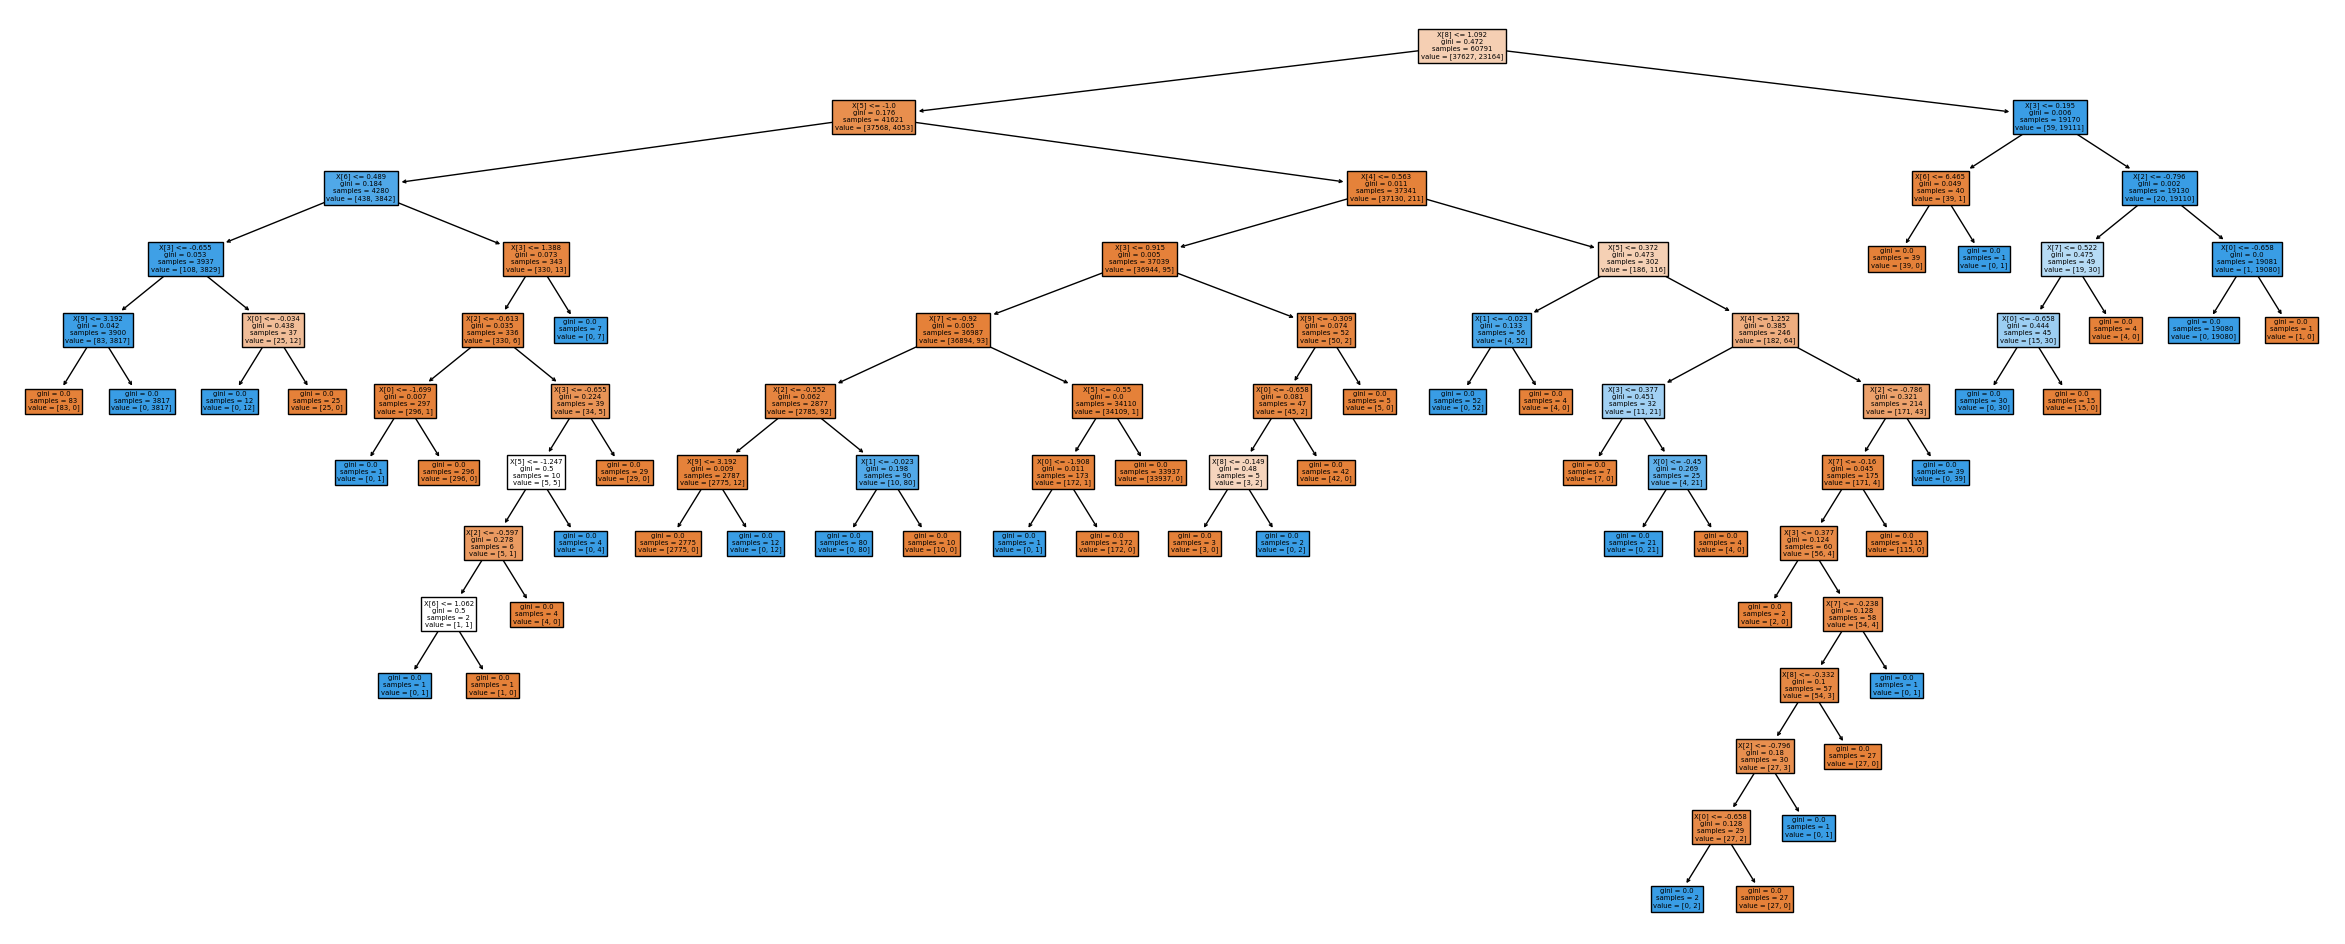

In [101]:
fig = plt.figure(figsize = (30,12))
tree.plot_tree(dt, filled=True);
plt.show()

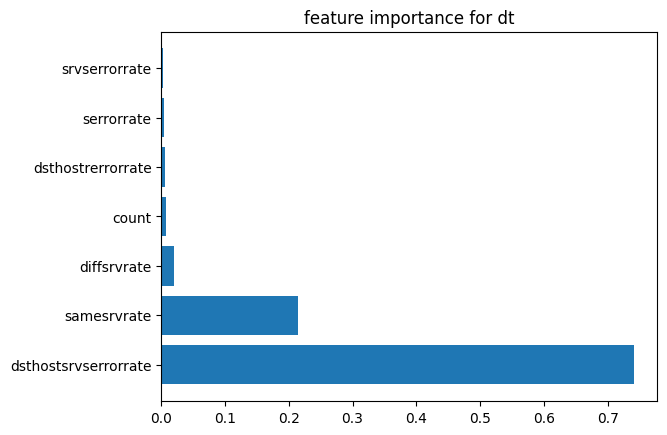

In [102]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(dt.feature_importances_), features_names, top=7)

# Random Forest Classifier

In [19]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 10, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [20]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)
print(study_rf.best_trial)

FrozenTrial(number=11, state=TrialState.COMPLETE, values=[0.9998848545328932], datetime_start=datetime.datetime(2024, 7, 3, 15, 41, 1, 484738), datetime_complete=datetime.datetime(2024, 7, 3, 15, 41, 1, 593657), params={'rf_max_depth': 30, 'rf_max_features': 2, 'rf_n_estimators': 3}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=10, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, trial_id=11, value=None)


In [22]:
rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], max_depth = study_rf.best_trial.params['rf_max_depth'], n_estimators = study_rf.best_trial.params['rf_n_estimators'])
rf.fit(x_train, y_train)

# Make predictions on the test data
predictions = rf.predict(test_scaled)

# Create a DataFrame with the predictions
result_df = pd.DataFrame(predictions, columns=['attack'])

# Save the predictions to a CSV file
result_df.to_csv('result.csv', index=False)

rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Train Score: 0.9999835501965751
Test Score: 0.9996929454210486


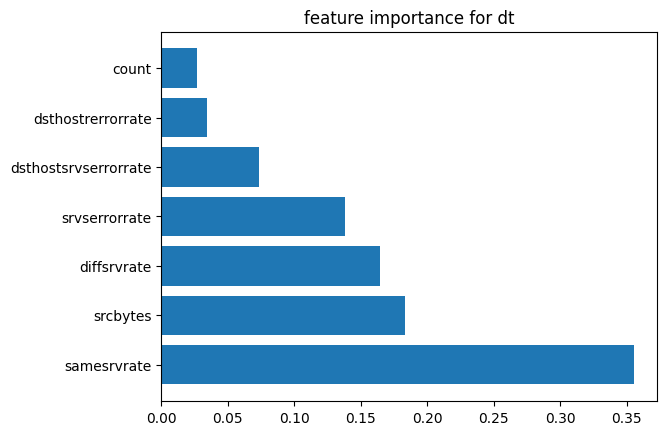

In [106]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(rf.feature_importances_), features_names, top=7)

# SKLearn Gradient Boosting Model

In [107]:
SKGB = GradientBoostingClassifier(random_state=42)
SKGB.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [108]:
SKGB_train, SKGB_test = SKGB.score(x_train , y_train), SKGB.score(x_test , y_test)

print(f"Training Score: {SKGB_train}")
print(f"Test Score: {SKGB_test}")

Training Score: 1.0
Test Score: 0.9996929454210486


# XGBoost Gradient Boosting Model

In [109]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [110]:
xgb_train, xgb_test = xgb_model.score(x_train , y_train), xgb_model.score(x_test , y_test)

print(f"Training Score: {xgb_train}")
print(f"Test Score: {xgb_test}")

Training Score: 1.0
Test Score: 0.9996929454210486


# Light Gradient Boosting Model

In [111]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 23164, number of negative: 37627
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 60791, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381043 -> initscore=-0.485123
[LightGBM] [Info] Start training from score -0.485123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMClassifier(random_state=42)

In [112]:
lgb_train, lgb_test = lgb_model.score(x_train , y_train), lgb_model.score(x_test , y_test)

print(f"Training Score: {lgb_train}")
print(f"Test Score: {lgb_test}")

Training Score: 1.0
Test Score: 0.9998848545328932


# SKLearn AdaBoost Model

In [113]:
ab_model = AdaBoostClassifier(random_state=42)

In [114]:
ab_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [115]:
ab_train, ab_test = ab_model.score(x_train , y_train), ab_model.score(x_test , y_test)

print(f"Training Score: {ab_train}")
print(f"Test Score: {ab_test}")

Training Score: 1.0
Test Score: 0.9995777999539418


# CatBoost Classifier Model

In [116]:
cb_model = CatBoostClassifier(verbose=0)

In [117]:
cb_model.fit(x_train, y_train)

In [118]:
cb_train, cb_test = cb_model.score(x_train , y_train), cb_model.score(x_test , y_test)

print(f"Training Score: {cb_train}")
print(f"Test Score: {cb_test}")

Training Score: 1.0
Test Score: 0.9997697090657864


# Naive Baye Model

In [119]:
BNB_model = BernoulliNB()
BNB_model.fit(x_train, y_train)

BernoulliNB()

In [120]:
BNB_train, BNB_test = BNB_model.score(x_train , y_train), BNB_model.score(x_test , y_test)

print(f"Training Score: {BNB_train}")
print(f"Test Score: {BNB_test}")

Training Score: 0.996841637742429
Test Score: 0.9965840178091656


# Voting Model 

In [121]:
v_clf = VotingClassifier(estimators=[('KNeighborsClassifier', KNN_model), ("XGBClassifier", xgb_model), ("RandomForestClassifier", rf), ("DecisionTree", dt), ("XGBoost", xgb_model), ("LightGB", lgb_model), ("AdaBoost", ab_model), ("Catboost", cb_model)], voting = "hard")

In [122]:
v_clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 23164, number of negative: 37627
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 60791, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381043 -> initscore=-0.485123
[LightGBM] [Info] Start training from score -0.485123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=11)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_t...
                                            max_delta_step=0, max_depth=6,
                                            max_leaves=0, min_child_weight=1,
                                     

In [123]:
voting_train, voting_test = v_clf.score(x_train , y_train), v_clf.score(x_test , y_test)

print(f"Training Score: {voting_train}")
print(f"Test Score: {voting_test}")

Training Score: 1.0
Test Score: 0.9998080908881554


# SVM Model

In [124]:
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'linearSVC'])
    c = trial.suggest_float('c', 0.02, 1.0, step=0.02)
    if kernel in ['linear', 'rbf']:
        classifier_obj = SVC(kernel=kernel, C=c).fit(x_train, y_train)
    elif kernel == 'linearSVC':
        classifier_obj = LinearSVC(C=c).fit(x_train, y_train)
    elif kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 10)
        classifier_obj = SVC(kernel=kernel, C=c, degree=degree).fit(x_train, y_train)
        
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [125]:
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective, n_trials=30)
print(study_svm.best_trial)

FrozenTrial(number=22, state=TrialState.COMPLETE, values=[0.9997313272434175], datetime_start=datetime.datetime(2024, 7, 3, 13, 41, 48, 226638), datetime_complete=datetime.datetime(2024, 7, 3, 13, 41, 49, 467031), params={'kernel': 'rbf', 'c': 1.0}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'kernel': CategoricalDistribution(choices=('linear', 'rbf', 'poly', 'linearSVC')), 'c': FloatDistribution(high=1.0, log=False, low=0.02, step=0.02)}, trial_id=22, value=None)


In [126]:
if study_svm.best_trial.params['kernel'] in ['linear', 'rbf']:
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'])
elif kernel == 'linearSVC':
    SVM_model = LinearSVC(C=study_svm.best_trial.params['c'])
elif kernel == 'poly':
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'], degree=study_svm.best_trial.params['degree'])

SVM_model.fit(x_train, y_train)

SVC()

In [127]:
SVM_train, SVM_test = SVM_model.score(x_train , y_train), SVM_model.score(x_test , y_test)

print(f"Training Score: {SVM_train}")
print(f"Test Score: {SVM_test}")

Training Score: 0.9998190521623267
Test Score: 0.9997313272434175


# Summary

In [129]:
data = [["KNN", KNN_train, KNN_test], 
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test], 
        ["Random Forest", rf_train, rf_test], 
        ["GBM", SKGB_train, SKGB_test], 
        ["XGBM", xgb_train, xgb_test], 
        ["Adaboost", ab_train, ab_test], 
        ["light GBM", lgb_train, lgb_test],
        ["CatBoost", cb_train, cb_test], 
        ["Naive Baye Model", BNB_train, BNB_test], 
        ["Voting", voting_train, voting_test],
        ["SVM", SVM_train, SVM_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.999671 │     0.999501 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.999178 │     0.999117 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      1        │     0.999271 │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │      1        │     0.999693 │
├─────────────────────┼───────────────┼──────────────┤
│ GBM                 │      1        │     0.999693 │
├─────────────────────┼───────────────┼──────────────┤
│ XGBM                │      1        │     0.999693 │
├─────────────────────┼───────────────┼──────────────┤
│ Adaboost            │      1        │     0.999578 │
├─────────────────────┼───────────────┼──────────────┤
│ light GBM           │      1        │     0.999885 │
├─────────

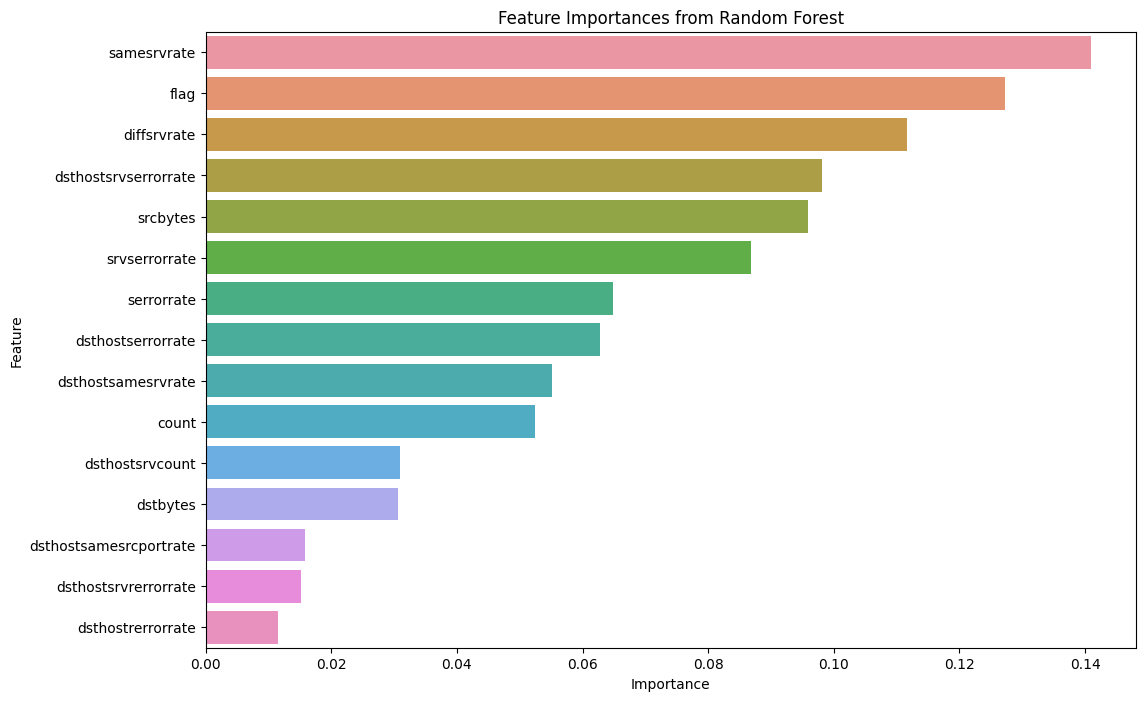

<Figure size 1400x800 with 0 Axes>

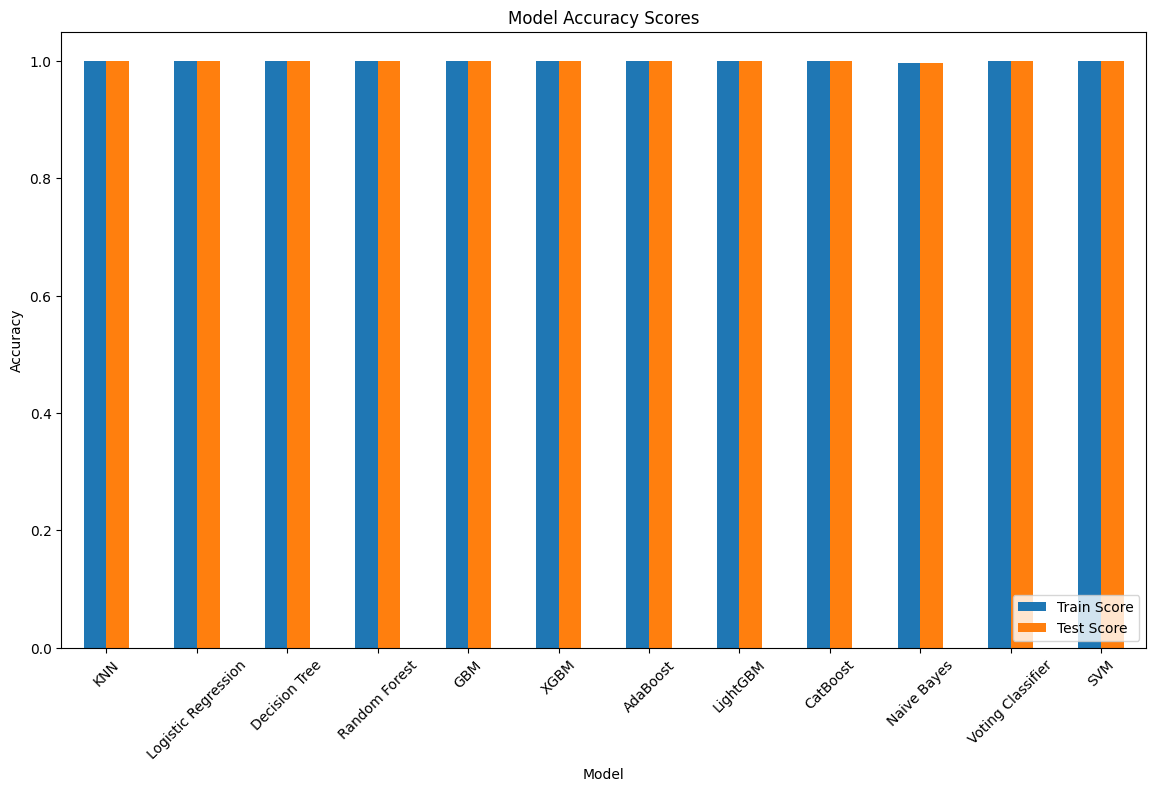

In [4]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importances from Random Forest
feature_importances = rf.feature_importances_
features = selected_features

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Plot train and test accuracy scores
models = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'GBM', 'XGBM', 'AdaBoost', 'LightGBM', 'CatBoost', 'Naive Bayes', 'Voting Classifier', 'SVM']
train_scores = [0.999803, 0.999638, 1, 1, 1, 1, 1, 1, 1, 0.997352, 1, 0.999836]  # These should be your actual train scores
test_scores = [0.999808, 0.999539, 0.999463, 0.999846, 0.999655, 0.999731, 0.999731, 0.999846, 0.999731, 0.997083, 0.999731, 0.999808]  # These should be your actual test scores

score_df = pd.DataFrame({'Model': models, 'Train Score': train_scores, 'Test Score': test_scores})

# Plot train and test scores
plt.figure(figsize=(14, 8))
score_df.set_index('Model').plot(kind='bar', figsize=(14, 8))
plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()
